<a href="https://colab.research.google.com/github/sabudev/CAIF/blob/main/Team_3_CAIF_Module3_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3 - CAIF Module 3 Model Evaluation

#### In this Python notebook we look at a tmdb dataset that contains diverse attributes of selected movies. The notebook focuses on doing simple descriptive analysis of the data, including summarization and visualization

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn.impute import SimpleImputer

We had to adjust the column headings of the CSV files to match between datasets, for e.g. TMDB ID to movie_id, add missing column titles etc. 
We also had to remove some junk data from the CSV files as they were not in the column format

### Load all available tmdb data from git to access the data files

In [ ]:
! rm -Rf ./CAIF
! git clone https://github.com/sabudev/CAIF.git

Cloning into 'CAIF'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 50 (delta 22), reused 28 (delta 13), pack-reused 0
Unpacking objects: 100% (50/50), done.


Read genres, and attributes files
Use escapechar='\\' to accomdate for escaped characters in the CSV file, if we don't provide this it was failing to read data correctly from file.

In [109]:
genres_csv = pd.read_csv('CAIF/tmdb_genres.csv', escapechar='\\')
tmdb_attributes_csv = pd.read_csv('CAIF/tmdb_attributes.csv', escapechar='\\')
links_csv = pd.read_csv('CAIF/links.csv', escapechar='\\')
imdb_attributes_csv = pd.read_csv('CAIF/imdb_attributes.csv', escapechar='\\')

In [71]:
#tmdb_attributes_csv.info()

In [112]:
# Remove all rows without a release date
tmdb_attributes_csv = tmdb_attributes_csv[tmdb_attributes_csv['release_date'].notna()]
cols = ["budget","revenue"]
tmdb_attributes_csv[cols] = tmdb_attributes_csv[cols].replace({0:np.nan})
tmdb_attributes_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             3766 non-null   float64
 1   tmdb_id            4802 non-null   int64  
 2   original_language  4802 non-null   object 
 3   original_title     4802 non-null   object 
 4   popularity         4802 non-null   float64
 5   release_date       4802 non-null   object 
 6   revenue            3376 non-null   float64
 7   runtime            4800 non-null   float64
 8   tagline            3959 non-null   object 
 9   title              4802 non-null   object 
 10  vote_average       4802 non-null   float64
 11  vote_count         4802 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 487.7+ KB


In [113]:
# Function to calculate age given a date, we will use this to calculate
# age of a movie
def age(releaseDate):
    releaseDate = datetime.strptime(releaseDate, "%m/%d/%y").date()
    today = date.today()
    return today.year - releaseDate.year - ((today.month, 
                                      today.day) < (releaseDate.month, 
                                                    releaseDate.day))

In [114]:
tmdb_attributes_csv['age']=tmdb_attributes_csv['release_date'].apply(age)
#tmdb_attributes_csv

In [115]:
# Drop few categorial values from dataframe
tmdb_attributes_csv.drop(['original_language','original_title','release_date','tagline', 'title'], axis=1, inplace=True)
#tmdb_attributes_csv

In [116]:
imdb_attributes_csv.drop(['title','url','duration','year'], axis=1, inplace=True)
#imdb_attributes_csv

In [120]:
# Merge tmdb and imdb columns using links_csv provided
df=tmdb_attributes_csv.merge(links_csv, on='tmdb_id',how='left')
df=df.merge(imdb_attributes_csv, on="imdb_id", how="left")
i = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.imdbRating = i.fit_transform(df['imdbRating'].values.reshape(-1,1))[:,0]
df.nrOfNominations = i.fit_transform(df['nrOfNominations'].values.reshape(-1,1))[:,0]
df.nrOfWins = i.fit_transform(df['nrOfWins'].values.reshape(-1,1))[:,0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           3767 non-null   float64
 1   tmdb_id          4803 non-null   int64  
 2   popularity       4803 non-null   float64
 3   revenue          3377 non-null   float64
 4   runtime          4801 non-null   float64
 5   vote_average     4803 non-null   float64
 6   vote_count       4803 non-null   int64  
 7   age              4803 non-null   int64  
 8   imdb_id          3537 non-null   object 
 9   movie_id         3537 non-null   float64
 10  imdbRating       4803 non-null   float64
 11  nrOfWins         4803 non-null   object 
 12  nrOfNominations  4803 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 525.3+ KB


The imdb dataset doesn't have all the tmdb movies, only 1827 out of 4804 have nrOfWins data, we will drop this from our dataframe for now.

In [102]:
df.drop(['imdb_id','tmdb_id','movie_id', 'imdbRating', 'nrOfWins', 'nrOfNominations'], axis=1, inplace=True)

In [103]:
df

,budget,popularity,revenue,runtime,vote_average,vote_count,age,id,genre,title
0,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,0.0,Action,Avatar
1,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,1.0,Adventure,Avatar
2,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,2.0,Fantasy,Avatar
3,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,3.0,SciFi,Avatar
4,300000000.0,139.082615,9.610000e+08,169.0,6.9,4500,14,4.0,Adventure,Pirates of the Caribbean: At World's End
...,...,...,...,...,...,...,...,...,...,...
12187,NaN,1.444476,NaN,120.0,7.0,6,7,12156.0,Drama,"Signed, Sealed, Delivered"
12188,NaN,1.444476,NaN,120.0,7.0,6,7,12157.0,Romance,"Signed, Sealed, Delivered"
12189,NaN,1.444476,NaN,120.0,7.0,6,7,12158.0,TV Movie,"Signed, Sealed, Delivered"
12190,NaN,0.857008,NaN,98.0,5.7,7,9,NaN,NaN,NaN


In [104]:
df['vote_rating'] = pd.cut(df['vote_average'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])
df

,budget,popularity,revenue,runtime,vote_average,vote_count,age,id,genre,title,vote_rating
0,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,0.0,Action,Avatar,high
1,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,1.0,Adventure,Avatar,high
2,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,2.0,Fantasy,Avatar,high
3,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,11,3.0,SciFi,Avatar,high
4,300000000.0,139.082615,9.610000e+08,169.0,6.9,4500,14,4.0,Adventure,Pirates of the Caribbean: At World's End,medium
...,...,...,...,...,...,...,...,...,...,...,...
12187,NaN,1.444476,NaN,120.0,7.0,6,7,12156.0,Drama,"Signed, Sealed, Delivered",medium
12188,NaN,1.444476,NaN,120.0,7.0,6,7,12157.0,Romance,"Signed, Sealed, Delivered",medium
12189,NaN,1.444476,NaN,120.0,7.0,6,7,12158.0,TV Movie,"Signed, Sealed, Delivered",medium
12190,NaN,0.857008,NaN,98.0,5.7,7,9,NaN,NaN,NaN,medium


In [105]:
df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,age,id
budget,1.000000,0.453006,0.706092,0.240512,0.019425,0.572178,-0.055765,-0.806931
popularity,0.453006,1.000000,0.606672,0.209589,0.273468,0.758229,-0.080511,-0.411256
revenue,0.706092,0.606672,1.000000,0.230621,0.199386,0.771354,-0.036124,-0.529351
runtime,0.240512,0.209589,0.230621,1.000000,0.354017,0.276049,-0.001360,-0.286219
vote_average,0.019425,0.273468,0.199386,0.354017,1.000000,0.333478,0.014048,-0.073422
vote_count,0.572178,0.758229,0.771354,0.276049,0.333478,1.000000,-0.070032,-0.458736
age,-0.055765,-0.080511,-0.036124,-0.001360,0.014048,-0.070032,1.000000,-0.050744
id,-0.806931,-0.411256,-0.529351,-0.286219,-0.073422,-0.458736,-0.050744,1.000000


### Read tmdb_attributes CSV data file

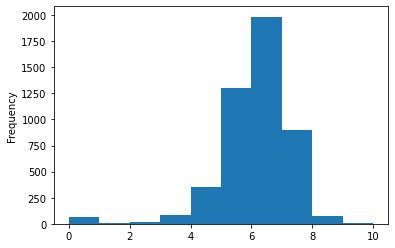

In [ ]:
attributes_csv['vote_average'].plot.hist()

**Fancy histogram with header and axis labels. A similar logic can be used to construct any type of bar chart. In this case, we are treating points as a discrete (nominal) variable.**

Text(0, 0.5, 'Frequency')

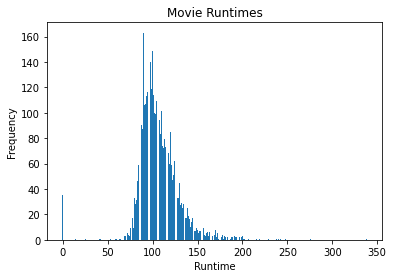

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = attributes_csv['runtime'].value_counts() 

# get x and y data 
runtime = data.index 
frequency = data.values 

# create bar chart 
ax.bar(runtime, frequency) 

# set title and labels 
ax.set_title('Movie Runtimes') 
ax.set_xlabel('Runtime') 
ax.set_ylabel('Frequency')

### Check the correlation between numerical features to understand relationships in the data

Text(0.5, 1.0, 'CORRELATION HEATMAP')

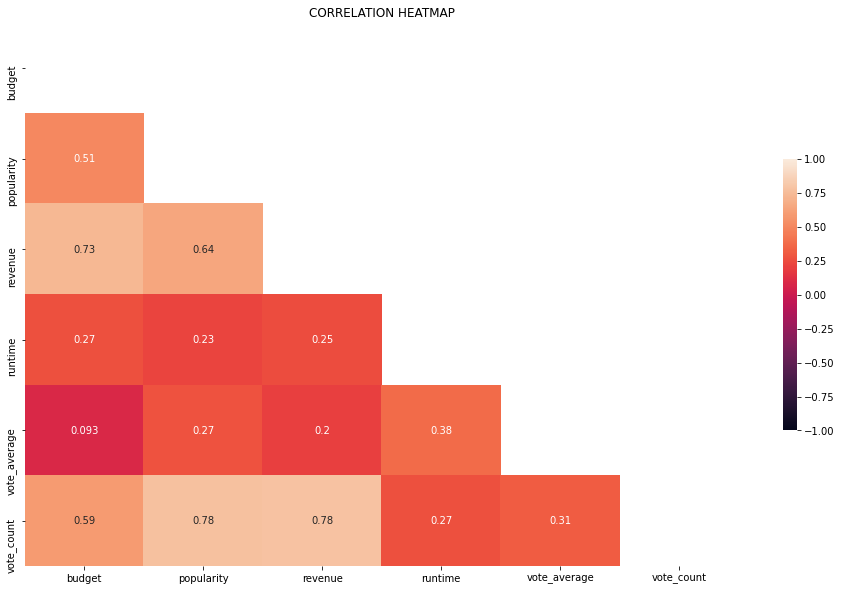

In [ ]:
plt.figure(figsize=(16, 10))
corr = attributes_csv.drop(["movie_id"], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cbar_kws={"shrink": .5})
heatmap.set_title('CORRELATION HEATMAP')

Indicates there is correlation between budget and revenue. Also higher vote_count yields better revenue and popularity.